11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) uint8
(60000, 28, 28, 1)


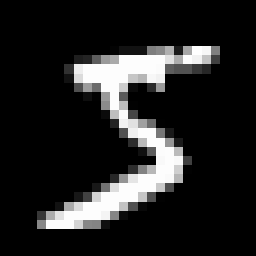

(60000,)
(60000, 10)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 6)         60        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        880       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None,

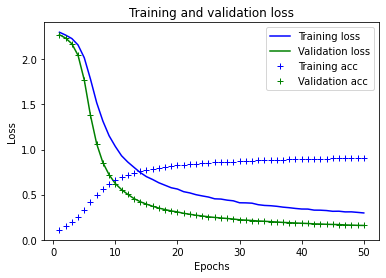

In [1]:
import tensorflow as tf
import tensorflow.keras
from matplotlib import pyplot as plt

from keras.datasets import cifar10
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten

#cifar10
#img_size =32
#ch =3

#mnist
img_size = 28
ch = 1

#Load pre_shuffled MNIST data into train and test sets
#(train_imgs, train_labels), (test_imgs, test_labels) = cifar10.load_data()
(train_imgs, train_labels), (test_imgs, test_labels) = mnist.load_data()

print(train_imgs.shape, train_imgs.dtype)

train_imgs = train_imgs.reshape(train_imgs.shape[0], img_size, img_size, ch)
test_imgs = test_imgs.reshape(test_imgs.shape[0], img_size, img_size, ch)

print(train_imgs.shape) #(60000,28,28,1)

train_imgs = train_imgs[..., ::-1]
test_imgs = test_imgs[..., ::-1]

import cv2
v_img = cv2.resize(train_imgs[0], (256,256), interpolation = cv2.INTER_NEAREST)

#colab에서 구동
from google.colab.patches import cv2_imshow
cv2_imshow(v_img)

#data형을 float32로 바꾸고 값의 범위는 [0,1]로
train_imgs = train_imgs.astype('float32')
test_imgs = test_imgs.astype('float32')
train_imgs /= 255
test_imgs /= 255

print(train_labels.shape)

#one hot encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

print(train_labels.shape)

Val_Imgs = train_imgs[40000:50000]
Val_Labels = train_labels[40000:50000]

Train_Imgs = train_imgs[:40000]
Train_Labels = train_labels[:40000]

Test_Imgs = test_imgs[:10000]
Test_Labels = test_labels[:10000]

#Keras cnn model  (opt,loss,kernel크기 변경)
model = Sequential()
model.add(Conv2D(6,(3,3), activation ='relu', input_shape=(img_size, img_size, ch)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(16,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])
model.summary()


print('model fit...')
epoch = 50
history = model.fit(Train_Imgs, Train_Labels, batch_size = 512, epochs = epoch, 
                    validation_data = (Val_Imgs, Val_Labels))
score = model.evaluate(Test_Imgs, Test_Labels, verbose=0)
print("%.2f%%" %score[1]*100)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
print(loss_values)
print(val_loss_values)

epochs = range(1, epoch+1)

plt.plot(epochs, loss_values, 'b-', label='Training loss')
plt.plot(epochs, val_loss_values, 'g-', label='Validation loss')
plt.plot(epochs, acc_values, 'b+', label='Training acc')
plt.plot(epochs, val_loss_values, 'g+', label='Validation acc')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

(3, 3, 1, 6)
(3, 3, 6, 16)


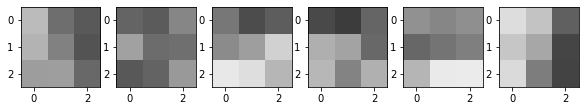

In [2]:
weight0 = model.layers[0].get_weights()[0] 
weight2 = model.layers[2].get_weights()[0] 
print (weight0.shape) 
print (weight2.shape) 

import numpy as np

nofwgt = weight0.shape[3]
ws = weight0.shape[0]    

# weight(filter)를 보기 위한 numpy 배열 
w = np.zeros(shape=(nofwgt, ws, ws), dtype=np.uint8)

for m in range(nofwgt):
    tmp = 128*weight0[:,:,0,m] + 128   
    w[m] = np.clip(tmp, 0, 255)

plt.figure(figsize=(10,6))  
for i in range(nofwgt):
    plt.subplot(2, 6, i+1)    
    plt.imshow(w[i], cmap='gray', interpolation='nearest', vmin=0, vmax=255)
plt.show()

(1, 13, 13, 6)


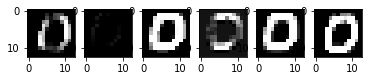

In [3]:
import numpy as np

imgs = np.ndarray((1, 28, 28, 1), dtype=np.float32)
imgs[0] = Test_Imgs[10]

from keras import backend as K

# 입력과 원하는 출력단을 지정, 첫 번째 입력 사용, layer 1 출력 얻기
get_layer_output = K.function([model.layers[0].input], [model.layers[1].output])
out_0 = get_layer_output([imgs])[0]  
print (out_0.shape)  

nofout = out_0.shape[3]
out_s = out_0.shape[1]
activation = np.zeros(shape=(nofout, out_s, out_s), dtype=np.uint8)

level_scale = 255
for i in range(nofout):
    tmp = level_scale*out_0[0,:,:,i]   
    activation[i] = np.clip(tmp, 0, 255)

for i in range(nofout):
    plt.subplot(2, 6, i+1)   
    plt.imshow(activation[i], cmap='gray', interpolation='nearest', vmin=0, vmax=255)

plt.show()